In [11]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Function to generate synthetic data
def generate_synthetic_data(num_records=100, start_date='2023-06-01', end_date='2023-12-01'):
    date_range = pd.date_range(start=start_date, end=end_date, freq='H')

    # List of service names
    services = ['order-srv-1', 'order-srv-2', 'vendor-srv-1','vendor-srv-2']

    data = []
    for _ in range(num_records):
        timestamp = random.choice(date_range)
        service_name = random.choice(services)
        cpu_usage = random.uniform(30, 100)  # Random CPU usage between 30% to 100%
        memory_usage = random.uniform(30, 100)  # Random Memory usage between 30% to 100%

        data.append([timestamp, service_name, cpu_usage, memory_usage])

    # Create a DataFrame
    df = pd.DataFrame(data, columns=['timestamp', 'service_name', 'cpu_usage', 'memory_usage'])
    return df

# Generate synthetic data
synthetic_data = generate_synthetic_data(num_records=100)

# Save synthetic data to CSV
synthetic_data.to_csv('synthetic_data.csv', index=False)

# Display the first few records of the generated data
synthetic_data.head()


<ipython-input-11-e5bce71dd021>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, end=end_date, freq='H')


,timestamp,service_name,cpu_usage,memory_usage
0,2023-06-05 13:00:00,order-srv-2,81.736571,31.013266
1,2023-07-18 00:00:00,order-srv-1,57.847849,39.859604
2,2023-07-03 20:00:00,order-srv-1,61.093367,97.116285
3,2023-07-20 21:00:00,vendor-srv-2,47.347880,94.488866
4,2023-10-28 04:00:00,order-srv-1,74.458435,75.924262


In [13]:
# Load the synthetic data
synthetic_data = pd.read_csv('synthetic_data.csv')

# Convert timestamp to datetime
synthetic_data['timestamp'] = pd.to_datetime(synthetic_data['timestamp'])

# Sort the data by timestamp to ensure proper merging
synthetic_data.sort_values(by='timestamp', inplace=True)

# Handle missing values (we can use interpolation, forward-fill, or back-fill)
synthetic_data.fillna(method='ffill', inplace=True)

# Display the cleaned data
synthetic_data.head()


<ipython-input-13-8e0c0497958f>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  synthetic_data.fillna(method='ffill', inplace=True)


,timestamp,service_name,cpu_usage,memory_usage
0,2023-06-05 13:00:00,order-srv-2,81.736571,31.013266
70,2023-06-06 02:00:00,vendor-srv-2,67.345444,36.836259
6,2023-06-08 01:00:00,vendor-srv-2,77.176594,81.667493
69,2023-06-08 03:00:00,vendor-srv-1,83.403658,30.131039
93,2023-06-09 10:00:00,order-srv-2,85.952060,87.245204


In [34]:
from scipy.stats import zscore

# Calculate Z-scores for CPU and Memory usage
synthetic_data['cpu_zscore'] = zscore(synthetic_data['cpu_usage'])
synthetic_data['memory_zscore'] = zscore(synthetic_data['memory_usage'])

# Define anomaly threshold (for example, Z-score > 2 or Z-score < -2)
threshold = 1
synthetic_data['cpu_anomaly'] = np.where(np.abs(synthetic_data['cpu_zscore']) > threshold, 1, 0)
synthetic_data['memory_anomaly'] = np.where(np.abs(synthetic_data['memory_zscore']) > threshold, 1, 0)

# Display anomalies
cpu_anomalies = synthetic_data[synthetic_data['cpu_anomaly'] == 1]
memory_anomalies = synthetic_data[synthetic_data['memory_anomaly'] == 1]

print("Detected CPU Anomalies:")
print(cpu_anomalies[['timestamp', 'service_name', 'cpu_usage', 'cpu_zscore']])

print("\nDetected Memory Anomalies:")
print(memory_anomalies[['timestamp', 'service_name', 'memory_usage', 'memory_zscore']])


Detected CPU Anomalies:
             timestamp  service_name  cpu_usage  cpu_zscore
49 2023-06-09 17:00:00  vendor-srv-2  41.807228   -1.204231
87 2023-06-10 01:00:00  vendor-srv-1  97.160616    1.512698
39 2023-06-10 07:00:00   order-srv-1  90.267742    1.174373
26 2023-06-12 15:00:00   order-srv-2  32.834425   -1.644646
74 2023-06-24 06:00:00  vendor-srv-1  31.703387   -1.700161
71 2023-06-24 16:00:00  vendor-srv-2  90.646907    1.192983
66 2023-07-13 22:00:00   order-srv-2  33.822352   -1.596155
15 2023-07-19 12:00:00   order-srv-1  94.095268    1.362240
62 2023-07-20 14:00:00   order-srv-2  44.586309   -1.067824
33 2023-07-22 01:00:00  vendor-srv-2  88.272534    1.076441
94 2023-07-27 22:00:00   order-srv-2  95.351457    1.423898
80 2023-07-29 14:00:00   order-srv-2  97.221178    1.515670
32 2023-08-10 13:00:00  vendor-srv-1  97.921418    1.550040
75 2023-08-11 08:00:00   order-srv-1  97.257281    1.517442
91 2023-08-17 17:00:00  vendor-srv-1  39.038311   -1.340138
72 2023-08-19 13

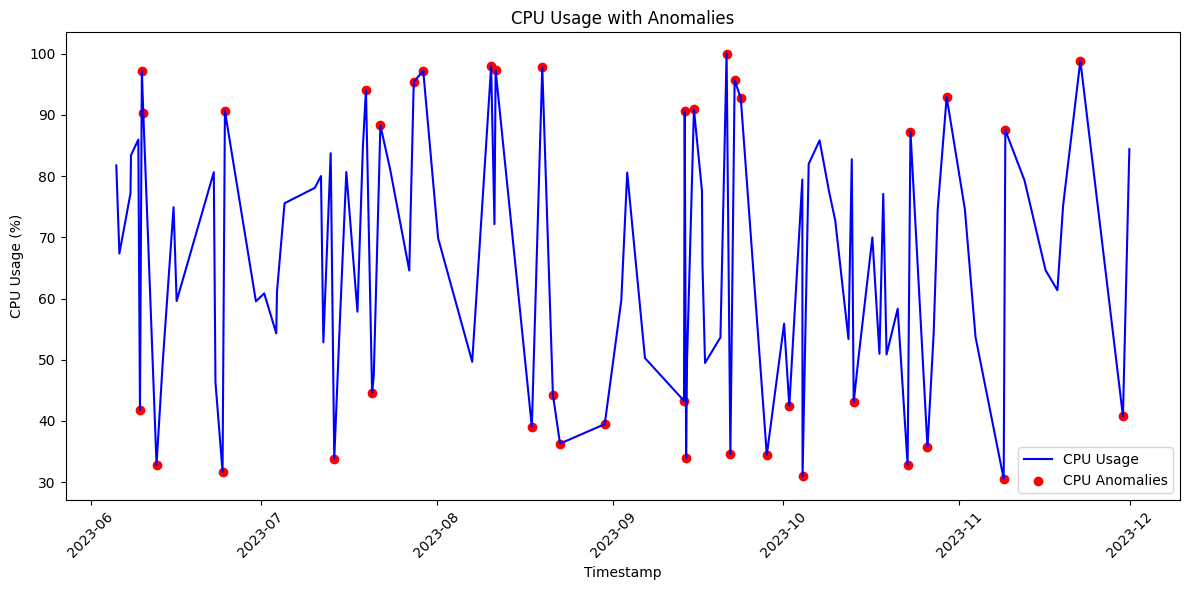

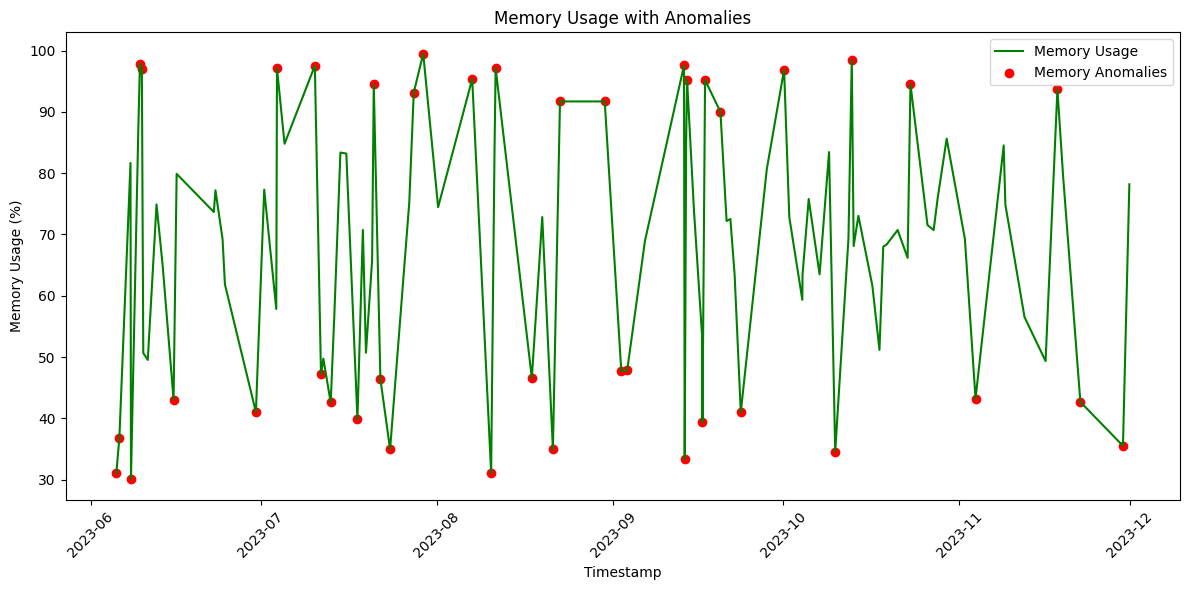

In [35]:
import matplotlib.pyplot as plt

# Plot CPU usage and highlight anomalies
plt.figure(figsize=(12, 6))
plt.plot(synthetic_data['timestamp'], synthetic_data['cpu_usage'], label='CPU Usage', color='blue')
plt.scatter(cpu_anomalies['timestamp'], cpu_anomalies['cpu_usage'], color='red', label='CPU Anomalies')
plt.title('CPU Usage with Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Memory usage and highlight anomalies
plt.figure(figsize=(12, 6))
plt.plot(synthetic_data['timestamp'], synthetic_data['memory_usage'], label='Memory Usage', color='green')
plt.scatter(memory_anomalies['timestamp'], memory_anomalies['memory_usage'], color='red', label='Memory Anomalies')
plt.title('Memory Usage with Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load GPT-2 model and tokenizer from Hugging Face
model = GPT2LMHeadModel.from_pretrained("gpt2")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Function to generate a response from GPT-2 based on a prompt
def generate_response(prompt):
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    outputs = model.generate(inputs, max_length=250, num_return_sequences=1, no_repeat_ngram_size=2)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

# Example: Generate response for a detected anomaly
# Retrieve the most recent anomaly (for simplicity)
recent_anomaly = synthetic_data[synthetic_data['cpu_anomaly'] == 1].iloc[-1]

# Dynamically construct the anomaly message with service name and timestamp
new_anomaly = (f"Detected CPU anomaly in {recent_anomaly['service_name']} "
               f"at {recent_anomaly['timestamp']}. CPU usage is {recent_anomaly['cpu_usage']:.2f}%.")


# Create prompt for GPT-2
prompt = f"Historical anomalies:\n{historical_anomalies_text}\nNew anomaly: {new_anomaly}\n\nWhat is the cause and solution for this anomaly?"

# Generate response from GPT-2
response = generate_response(prompt)
print(response)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Historical anomalies:
97.1606157661637
32.834424988558084
31.70338749350891
33.82235170315828
97.22117787482884
97.92141761818807
97.25728126156449
97.7552135522123
33.962496825457265
99.9970809251495
34.61385553193715
34.45464457630501
30.968558007316517
32.820680560453866
35.67735835969824
30.553367199011248
98.84291864745362
New anomaly: Detected CPU anomaly in vendor-srv-2 at 2023-11-29 19:00:00. CPU usage is 40.76%.

What is the cause and solution for this anomaly?
.
,
The CPU is running at a high frequency. The CPU has a low frequency and the CPU's memory is not being used. This is a common problem with the Intel® Core™


In [37]:
# Combine anomalies into one DataFrame
anomalies_df = pd.concat([cpu_anomalies[['timestamp', 'service_name', 'cpu_usage', 'cpu_zscore']],
                          memory_anomalies[['timestamp', 'service_name', 'memory_usage', 'memory_zscore']]],
                         ignore_index=True)

# Save the anomalies to a CSV file
anomalies_df.to_csv('detected_anomalies.csv', index=False)

# Display the anomalies
print(anomalies_df)


             timestamp  service_name  cpu_usage  cpu_zscore  memory_usage  \
0  2023-06-09 17:00:00  vendor-srv-2  41.807228   -1.204231           NaN   
1  2023-06-10 01:00:00  vendor-srv-1  97.160616    1.512698           NaN   
2  2023-06-10 07:00:00   order-srv-1  90.267742    1.174373           NaN   
3  2023-06-12 15:00:00   order-srv-2  32.834425   -1.644646           NaN   
4  2023-06-24 06:00:00  vendor-srv-1  31.703387   -1.700161           NaN   
..                 ...           ...        ...         ...           ...   
75 2023-10-23 09:00:00   order-srv-2        NaN         NaN     94.514763   
76 2023-11-03 20:00:00   order-srv-1        NaN         NaN     43.206299   
77 2023-11-18 06:00:00   order-srv-1        NaN         NaN     93.691350   
78 2023-11-22 07:00:00  vendor-srv-1        NaN         NaN     42.677940   
79 2023-11-29 19:00:00  vendor-srv-2        NaN         NaN     35.509477   

    memory_zscore  
0             NaN  
1             NaN  
2             N